Groundtruth
((1, 235, 212, 321), (8, 4))


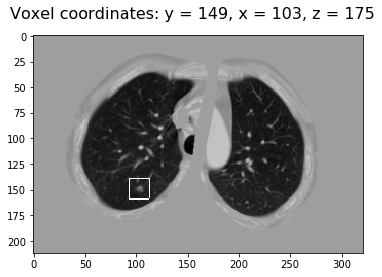

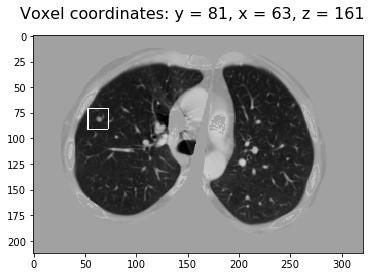

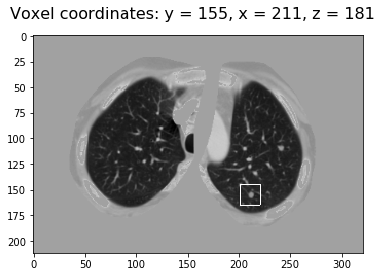

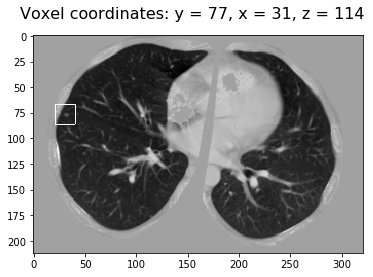

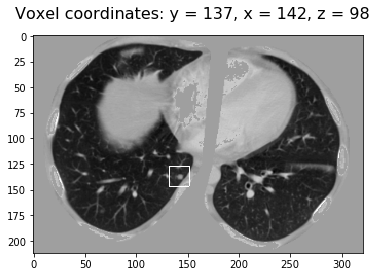

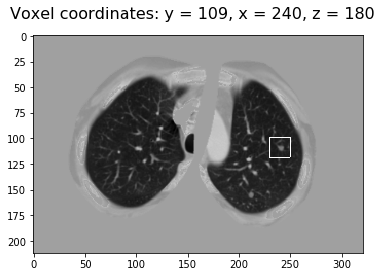

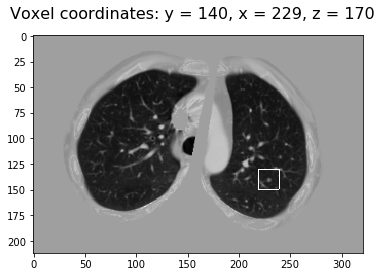

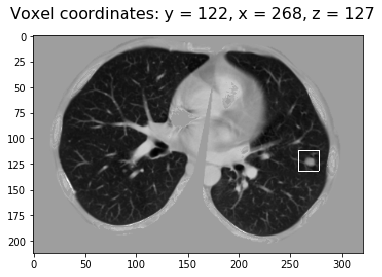

In [3]:
import os 
import numpy as np 
import pandas as pd
from utilities import *


cwd = os.getcwd()
print (cwd)

os.chdir(cwd+'/Desktop/')

## Read labels
true_labels=pd.read_csv('./stage_2_train_labels.csv')
pred_labels_095=pd.read_csv('./submission_min_conf=0.95.csv')
pred_labels_090=pd.read_csv('./submission_min_conf=0.9.csv')
pred_labels_080=pd.read_csv('./submission_min_conf=0.8.csv')
pred_labels_070=pd.read_csv('./submission_min_conf=0.7.csv')
pred_labels_060=pd.read_csv('./submission_min_conf=0.6.csv')
pred_labels_050=pd.read_csv('./submission_min_conf=0.5.csv')
## suidID

ID_true = true_labels['patientId']
ID_pred_095 = pred_labels_095['patientId']
ID_pred_090 = pred_labels_090['patientId']
ID_pred_080 = pred_labels_080['patientId']
ID_pred_070 = pred_labels_070['patientId']
ID_pred_060 = pred_labels_060['patientId']
ID_pred_050 = pred_labels_050['patientId']


## PARSE
# Test labels
true_parsed = test(true_labels,ID_true,ID_pred_095)

# Predicted
pred_parsed_095 = predicted(pred_labels_095, ID_pred_095)
pred_parsed_090 = predicted(pred_labels_090, ID_pred_090)
pred_parsed_080 = predicted(pred_labels_080, ID_pred_080)
pred_parsed_070 = predicted(pred_labels_070, ID_pred_070)
pred_parsed_060 = predicted(pred_labels_060, ID_pred_060)
pred_parsed_050 = predicted(pred_labels_050, ID_pred_050)

## Calculate true positiv, true negativ, false positiv, etc. 
#  IOU treshhold
iou = 0.5
sum_of_all, True_positiv_095, True_negativ_095, False_positiv_095, False_negativ_095 = calucalteTP_TN_FP_FN(pred_parsed_095, true_parsed, iou)
_, True_positiv_090, True_negativ_090, False_positiv_090, False_negativ_090 = calucalteTP_TN_FP_FN(pred_parsed_090, true_parsed, iou)
_, True_positiv_080, True_negativ_080, False_positiv_080, False_negativ_080 = calucalteTP_TN_FP_FN(pred_parsed_080, true_parsed, iou)
_, True_positiv_070, True_negativ_070, False_positiv_070, False_negativ_070 = calucalteTP_TN_FP_FN(pred_parsed_070, true_parsed, iou)
_, True_positiv_060, True_negativ_060, False_positiv_060, False_negativ_060 = calucalteTP_TN_FP_FN(pred_parsed_060, true_parsed, iou)
_, True_positiv_050, True_negativ_050, False_positiv_050, False_negativ_050 = calucalteTP_TN_FP_FN(pred_parsed_050, true_parsed, iou)



## PLOT

import matplotlib.pyplot as plt

_090
# conf 0.95

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["True Positive: "+str(True_positiv_090),
          "True Negative: "+str(True_negativ_090),
          "False Positive: "+str(False_positiv_090),
          "False Negative: "+str(False_negativ_090)]

data = [True_positiv_090, True_negativ_090, False_positiv_090, False_negativ_090]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Results with a confidence above 0.90")
plt.savefig('piechart_090.png')
plt.show()


## IOU PLOT

tp_95 = []
tn_95 = []
fp_95 = []
fn_95 = []

tp_90 = []
tn_90 = []
fp_90 = []
fn_90 = []


iou_steps = np.linspace(0.1,0.9,9)
for i in range(0,len(iou_steps),1):
    iou=iou_steps[i,]
    print(iou)
    _, True_positiv_095, True_negativ_095, False_positiv_095, False_negativ_095 = calucalteTP_TN_FP_FN(pred_parsed_095, true_parsed, iou)
    _, True_positiv_090, True_negativ_090, False_positiv_090, False_negativ_090 = calucalteTP_TN_FP_FN(pred_parsed_090, true_parsed, iou)
    
    
    tp_95.append(True_positiv_095)
    tn_95.append(True_negativ_095)
    fp_95.append(False_positiv_095)
    fn_95.append(False_negativ_095)
    
    tp_90.append(True_positiv_090)
    tn_90.append(True_negativ_090)
    fp_90.append(False_positiv_090)
    fn_90.append(False_negativ_090)    
    
    
    
plt.plot(iou_steps, tp_95 , 'r--', iou_steps, tp_90, 'b--')
plt.plot(iou_steps, fp_95 , 'r-.', iou_steps, fp_90, 'b-.')
plt.ylabel('Number of patients [N]')
plt.xlabel('Intersection over union (IOU)')
plt.legend(['TP w. conf. 0.95','TP w. conf. 0.90','FP w. conf. 0.95','FP w. conf. 0.90'])
plt.savefig('changeIOU.png')
plt.show()
    

